In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
#Change directory to where the data is stored, define groups, and read area
os.chdir('C:/Users/Bryant Kane/OneDrive - University of North Carolina at Chapel Hill/Data/Raw Data/23.07.13 EDC37 autofluorescence/CSVs')

files = os.listdir()
files

group1 = '10 uM L-ala'
group2 = '10 uM AcAc'
group3 = '10 uM BHB'
group4 = 'Blank'


start_row = 3
end_row = 228
end_read = end_row - start_row

In [3]:
import pandas as pd

f_name_list = os.listdir()

def process_group_data(group_name, f_name_list, start_row, end_row):
    df_group = pd.DataFrame()

    count = 1
    for f_name in f_name_list:
        if group_name in f_name:
            data = pd.read_csv(f_name, skiprows=start_row, nrows=end_row - start_row, header=None)
            data.rename(columns={0: "Emission Wavelength", 1: "Fluorescence Units {}".format(count)}, inplace=True)
            data.set_index("Emission Wavelength", inplace=True)
            df_group = df_group.merge(data, how='outer', left_index=True, right_index=True)
            count += 1
    
    # Remove the "average" and "sd" columns if they exist
    df_group.drop(columns=["average", "sd"], errors="ignore", inplace=True)
    
    # Remove NaN columns
    df_group.dropna(axis=1, how='all', inplace=True)
    
    return df_group

# Define the group names and call the function for each group
group_names = [group1, group2, group3, group4]
dataframes = []

for group_name in group_names:
    df_group = process_group_data(group_name, f_name_list, start_row, end_row)
    dataframes.append(df_group)

# The resulting dataframes will be stored in the list 'dataframes'.
# Access each dataframe by using dataframes[0], dataframes[1], and so on.
# For example, df_1 = dataframes[0], df_2 = dataframes[1], and so on.

dataframes[0]


C:\Users\Bryant Kane\AppData\Local\Temp\ipykernel_24172\681207735.py:14: FutureWarning: Passing 'suffixes' which cause duplicate columns {'2_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_group = df_group.merge(data, how='outer', left_index=True, right_index=True)
C:\Users\Bryant Kane\AppData\Local\Temp\ipykernel_24172\681207735.py:14: FutureWarning: Passing 'suffixes' which cause duplicate columns {'2_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_group = df_group.merge(data, how='outer', left_index=True, right_index=True)
C:\Users\Bryant Kane\AppData\Local\Temp\ipykernel_24172\681207735.py:14: FutureWarning: Passing 'suffixes' which cause duplicate columns {'2_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_group = df_group.merge(data, how='outer', left_index=True, right_index=True)
C:\Users\Bryant Kane\AppData\Local\Temp\ipykernel_24172\681207735.py:14: FutureWarning: 

,Fluorescence Units 1,Fluorescence Units 2,Fluorescence Units 3,Fluorescence Units 4,Fluorescence Units 5,Fluorescence Units 6
Emission Wavelength,,,,,,
359.8,1289.4824,1299.4030,1299.9530,1314.3285,1295.3635,1309.2618
359.6,1297.3389,1308.0729,1307.4655,1322.2787,1303.0408,1317.5709
359.4,1305.2064,1316.9619,1315.1654,1331.3329,1311.5682,1325.7778
359.2,1313.1184,1325.7931,1324.3258,1341.0656,1320.5831,1333.9652
359.0,1321.8712,1334.9197,1333.1858,1350.4667,1328.9824,1342.4459
...,...,...,...,...,...,...
315.8,1965.5704,1978.6626,2008.2128,2027.7307,1993.5530,2020.9957
315.6,1958.5354,1972.3091,2001.4403,2021.4875,1987.4109,2015.1624
315.4,1951.0967,1966.0538,1993.8951,2015.1602,1981.4077,2007.9814


In [4]:
def average_pairs_of_columns(df_group):
    df_new = pd.DataFrame()

    col_count = 1
    for i in range(0, len(df_group.columns), 2):
        col1 = df_group.columns[i]
        col2 = df_group.columns[i+1]
        averaged_column = (df_group[col1] + df_group[col2]) / 2
        df_new[f'Average {col_count}'] = averaged_column
        col_count += 1

    return df_new

# Create a list to store the new dataframes
averaged_dataframes = []

# Iterate over the dataframes for each group and calculate averaged dataframes
for df_group in dataframes:
    df_averaged = average_pairs_of_columns(df_group)
    averaged_dataframes.append(df_averaged)

# The resulting dataframes with averaged values will be stored in the list 'averaged_dataframes'.
# Access each dataframe by using averaged_dataframes[0], averaged_dataframes[1], and so on.
# For example, df_1_averaged = averaged_dataframes[0], df_2_averaged

averaged_dataframes[0]


,Average 1,Average 2,Average 3
Emission Wavelength,,,
359.8,1294.44270,1307.14075,1302.31265
359.6,1302.70590,1314.87210,1310.30585
359.4,1311.08415,1323.24915,1318.67300
359.2,1319.45575,1332.69570,1327.27415
359.0,1328.39545,1341.82625,1335.71415
...,...,...,...
315.8,1972.11650,2017.97175,2007.27435
315.6,1965.42225,2011.46390,2001.28665
315.4,1958.57525,2004.52765,1994.69455


In [5]:
def calc_average_and_sd(df):
    # Calculate row-wise average and standard deviation
    df_new = pd.DataFrame()
    df_new['average'] = df.mean(axis=1)
    df_new['sd'] = df.std(axis=1)
    return df_new

# Create a list to store the new dataframes
average_sd_dataframes = []

# Iterate over the averaged_dataframes and calculate average and sd dataframes
for df_averaged in averaged_dataframes:
    df_avg_sd = calc_average_and_sd(df_averaged)
    average_sd_dataframes.append(df_avg_sd)

# The resulting dataframes with average and sd values will be stored in the list 'average_sd_dataframes'.
# Access each dataframe by using average_sd_dataframes[0], average_sd_dataframes[1], and so on.

average_sd_dataframes[0]


,average,sd
Emission Wavelength,,
359.8,1301.298700,6.409461
359.6,1309.294617,6.145816
359.4,1317.668767,6.144361
359.2,1326.475200,6.656036
359.0,1335.311950,6.724427
...,...,...
315.8,1999.120867,23.990320
315.6,1992.724267,24.185619
315.4,1985.932483,24.196821


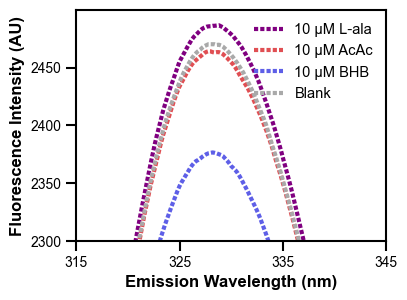

In [7]:
#make a scatter plot of the average fluorescence units for each wavelength
#import seaborn as sns
#cmap = sns.color_palette('deep')

import pickle

# Load the colormap object from the saved file
load_path = 'C:/Users/Bryant Kane/OneDrive - University of North Carolina at Chapel Hill/Data/Python Templates/Colormaps/custom_blend_cmap.pkl'
with open(load_path, 'rb') as f:
    cmap_blended = pickle.load(f)

#make axis labels larger font
plt.rcParams['font.family'] = 'Arial'
plt.xlabel('Emission Wavelength (nm)', fontweight='bold', fontsize=12)
plt.ylabel('Fluorescence Intensity (AU)', fontweight='bold', fontsize=12)
#emission wavelength (nm) in increments of 10
plt.xlim(315, 345)
plt.ylim(2300, 2500)
plt.xticks(np.arange(315, 350, 10))
plt.yticks(np.arange(2300, 2500, 50))

#bold the axis labels
plt.rcParams['axes.labelweight'] = 'bold'
#smooth line through the points, color with tab20, make the lines thicker
import matplotlib.pyplot as plt

plt.plot(average_sd_dataframes[0].index, average_sd_dataframes[0]['average'], color='purple', linewidth=3, linestyle=(0, (1, 0.5)), label='Group 1')
plt.plot(average_sd_dataframes[1].index, average_sd_dataframes[1]['average'], color=cmap_blended(0.8), linewidth=3, linestyle=(0, (1, 0.5)), label='Group 2')
plt.plot(average_sd_dataframes[2].index, average_sd_dataframes[2]['average'], color=cmap_blended(0.2), linewidth=3, linestyle=(0, (1, 0.5)), label='Group 3')
plt.plot(average_sd_dataframes[3].index, average_sd_dataframes[3]['average'], color='darkgrey', linewidth=3, linestyle=(0, (1, 0.5)), label='Blank')

plt.tick_params(axis='x', which='minor', length=3, width=1.5, direction='out', top=False, bottom=True)
plt.tick_params(axis='x', which='major', length=7, width=1.5, direction='out', top=False, bottom=True)
plt.tick_params(axis='y', which='major', length=7, width=1.5, direction='out', left=True, right=False)
plt.tick_params(axis='y', which='minor', length=3, width=1.5, direction='out', left=True, right=False)

plt.tick_params(axis='both', labelsize=10)

ax = plt.gca()
ax.spines['top'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)

ax.spines['top'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')

plt.rcParams['figure.figsize'] = [4, 3]

group11 = "10 μM L-ala"
group21 = "10 μM AcAc"
group31 = "10 μM BHB"
group41 = "Blank"

plt.legend([group11, group21, group31, group41], fontsize=10.5, loc='upper right', frameon=False)

plt.savefig('23.07.13 EDC37 Scatter.png', dpi=1200, bbox_inches='tight') 

In [8]:
# Initialize a dictionary to store the maximum average value and corresponding standard deviation for each group
max_values_dict = {}

# Loop over each dataframe in the 'average_sd_dataframes' list
for i, df in enumerate(average_sd_dataframes):
    # Find the row with the maximum average value
    max_row = df[df['average'] == df['average'].max()]
    
    # Get the maximum average value (this is the first and only entry in the 'average' column of 'max_row')
    max_average = max_row['average'].values[0]
    
    # Get the corresponding standard deviation (this is the first and only entry in the 'sd' column of 'max_row')
    corresponding_sd = max_row['sd'].values[0]
    
    # Store these values in the dictionary
    max_values_dict[f'df_{i+1}'] = {'max_average': max_average, 'corresponding_sd': corresponding_sd}

# Now 'max_values_dict' contains the maximum average value and corresponding standard deviation for each group
max_values_dict

{'df_1': {'max_average': 2486.599233333333,
  'corresponding_sd': 8.251524646138627},
 'df_2': {'max_average': 2464.0584375, 'corresponding_sd': 24.631474537583653},
 'df_3': {'max_average': 2376.45905, 'corresponding_sd': 50.19855394054352},
 'df_4': {'max_average': 2470.1694899999998,
  'corresponding_sd': 34.0506777641871}}

In [9]:
from scipy.stats import ttest_ind

# Initialize a dataframe to store all p-values
res_all_df = pd.DataFrame(columns=['comparison', 'p-value'])

# Identify the emission wavelength corresponding to the maximum average for each group
max_wavelengths = [df['average'].idxmax() for df in average_sd_dataframes]

# Define the group names
group_names = [group1, group2, group3, group4]

# Loop over each pair of dataframes in the 'averaged_dataframes' list
for i, df1 in enumerate(averaged_dataframes):
    for j, df2 in enumerate(averaged_dataframes):
        if i != j:
            # Get the values at the max wavelength for each dataframe
            values1 = df1.loc[max_wavelengths[i]]
            values2 = df2.loc[max_wavelengths[j]]

            # Perform t-test
            ttest_res = ttest_ind(values1, values2)

            # Store the comparison and p-value in the dataframe
            res_all_df = res_all_df.append({'comparison': f'{group_names[i]} vs {group_names[j]}', 'p-value': ttest_res.pvalue}, ignore_index=True)

# Now 'res_all_df' is a dataframe that contains all comparisons and their p-values
res_all_df

C:\Users\Bryant Kane\AppData\Local\Temp\ipykernel_24172\1914042303.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res_all_df = res_all_df.append({'comparison': f'{group_names[i]} vs {group_names[j]}', 'p-value': ttest_res.pvalue}, ignore_index=True)
C:\Users\Bryant Kane\AppData\Local\Temp\ipykernel_24172\1914042303.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res_all_df = res_all_df.append({'comparison': f'{group_names[i]} vs {group_names[j]}', 'p-value': ttest_res.pvalue}, ignore_index=True)
C:\Users\Bryant Kane\AppData\Local\Temp\ipykernel_24172\1914042303.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res_all_df = res_all_df.append({'comparison': f'{group_names[i]} vs {group_names[j]}', 'p-value': tte

,comparison,p-value
0,10 uM L-ala vs 10 uM AcAc,0.195898
1,10 uM L-ala vs 10 uM BHB,0.014357
2,10 uM L-ala vs Blank,0.455518
3,10 uM AcAc vs 10 uM L-ala,0.195898
4,10 uM AcAc vs 10 uM BHB,0.020241
5,10 uM AcAc vs Blank,0.772945
6,10 uM BHB vs 10 uM L-ala,0.014357
7,10 uM BHB vs 10 uM AcAc,0.020241
8,10 uM BHB vs Blank,0.012309
9,Blank vs 10 uM L-ala,0.455518


comparison: 10 uM L-ala vs Blank, p-value: 0.45551787861052095, label: n.s.
comparison: 10 uM AcAc vs Blank, p-value: 0.7729450891310623, label: n.s.
comparison: 10 uM BHB vs Blank, p-value: 0.012308963386323738, label: *
comparison: Blank vs 10 uM L-ala, p-value: 0.45551787861052095, label: n.s.
comparison: Blank vs 10 uM AcAc, p-value: 0.7729450891310623, label: n.s.
comparison: Blank vs 10 uM BHB, p-value: 0.012308963386323738, label: *


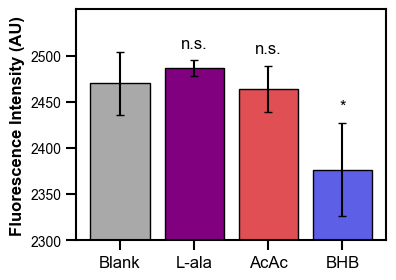

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

cmap = sns.color_palette('deep')

# Show plot with caps on the error bars, with black outlines around the bars
plt.rcParams['font.family'] = 'Arial'
plt.ylabel('Fluorescence Intensity (AU)', fontweight='bold', fontsize=12)

# Define group names in the desired order
group_names = ['Blank', 'L-ala', 'AcAc', 'BHB']
colors = ['darkgrey', 'purple', cmap_blended(0.8), cmap_blended(0.2)]

df_names = ['df_4', 'df_1', 'df_2', 'df_3']  # corresponding to 'Blank', 'L-ala', 'AcAc', 'BHB'
max_values = [max_values_dict[df_name]['max_average'] for df_name in df_names]
sd_values = [max_values_dict[df_name]['corresponding_sd'] for df_name in df_names]

for group, max_val, sd_val, color in zip(group_names, max_values, sd_values, colors):
    plt.bar(group, max_val, yerr=sd_val, capsize=3, edgecolor='black', color=color)

plt.tick_params(axis='both', labelsize=10)

plt.tick_params(axis='x', which='minor', length=3, width=1.5, direction='out', top=False, bottom=True)
plt.tick_params(axis='x', which='major', length=7, width=1.5, direction='out', top=False, bottom=True)
plt.tick_params(axis='y', which='major', length=7, width=1.5, direction='out', left=True, right=False)
plt.tick_params(axis='y', which='minor', length=3, width=1.5, direction='out', left=True, right=False)

ax = plt.gca()
ax.spines['top'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)

ax.spines['top'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')

plt.rcParams['figure.figsize'] = [4, 3]

#optimize the y axis range
plt.ylim(2300, 2550)
plt.yticks(np.arange(2300, 2550, 50), fontsize=10)
plt.xticks(fontsize=12)

plt.xticks(group_names, ['Blank', 'L-ala', 'AcAc', 'BHB'])

# Get the rows for comparisons with 'Blank'
rows = res_all_df[res_all_df['comparison'].str.contains('Blank')]

# Assign labels based on p-values
pval_label = []
for i, row in rows.iterrows():
    pvalue = row['p-value']
    comparison = row['comparison']
    if pvalue < 0.001:
        label = '***'
    elif pvalue < 0.01:
        label = '**'
    elif pvalue < 0.05:
        label = '*'
    else:
        label = 'n.s.'
    pval_label.append(label)
    print(f'comparison: {comparison}, p-value: {pvalue}, label: {label}')  # print the comparison, p-value, and its corresponding label

# Add the p-value labels to the plot, where the asterisk is centered, right on top of the error bar
for group, max_val, sd_val, label in zip(group_names[1:], max_values[1:], sd_values[1:], pval_label):  # Skip 'Blank'
    plt.text(group, max_val + sd_val + 10, label, ha='center', va='bottom', fontsize=12)



# plt.show()
plt.savefig('23.07.13 EDC37 Bar.png', dpi=1200, bbox_inches='tight') 
